In [1]:
import pandas as pd ## Pandas adalah pustaka Python yang kuat untuk manipulasi dan analisis data
import numpy as np ## NumPy adalah pustaka untuk operasi numerik di Python, menyediakan dukungan untuk array dan matriks berdimensi besar.
import matplotlib.pyplot as plt ##digunakan untuk membuat visualisasi seperti plot dan grafik.
from sklearn.cluster import KMeans ##mengimpor kelas KMeans dari modul sklearn.cluster.

import warnings ## warnings, yang digunakan untuk mengatasi peringatan (warnings) dalam Python.

warnings.filterwarnings("ignore") ##Baris ini mengatur filter untuk mengabaikan peringatan selama runtime

In [2]:
data = pd.read_csv('penguins.csv') ##membaca dataset
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [4]:
data = data[:][:300]

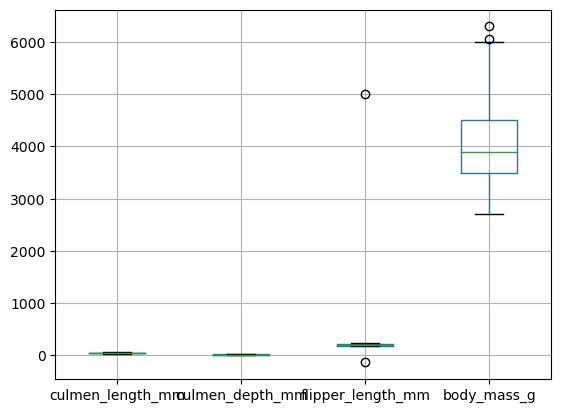

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [5]:
data.boxplot()
plt.show()
penguins_df = data.dropna()
penguins_df[penguins_df["flipper_length_mm"] > 4000]
penguins_df[penguins_df["flipper_length_mm"] < 0]
data_clean = penguins_df.drop([9, 14])
data_clean.head()
##dataset penguins disimpan dalam variabel penguins_df
##baris-baris yang memiliki nilai null dihapus dengan dropna()
##baris ke-9 dan ke-14 dihapus dari penguins_df dengan drop([9, 14]), dan data yang telah dibersihkan ditampilkan menggunakan head()

In [6]:
df = pd.get_dummies(data_clean)
df.head(10)
##Fungsi get_dummies dari Pandas digunakan untuk membuat variabel dummy dari kolom kategorikal dalam DataFrame.
##digunakan untuk menampilkan 10 baris pertama dari DataFrame df. Fungsi head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,1
6,38.9,17.8,181.0,3625.0,1,0
7,39.2,19.6,195.0,4675.0,0,1
12,41.1,17.6,182.0,3200.0,1,0
13,38.6,21.2,191.0,3800.0,0,1
15,36.6,17.8,185.0,3700.0,1,0


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaling = scaler.fit_transform(df)
data_preprocess = pd.DataFrame(data=scaling, columns = df.columns)
data_preprocess.head(10)

##Proses ini bertujuan untuk menormalkan nilai-nilai dalam dataset
##memastikan bahwa setiap fitur memiliki mean 0 dan deviasi standar 1
##yang berguna untuk meningkatkan kinerja algoritma pembelajaran mesin yang sensitif terhadap skala data.

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.793275,0.669418,-1.351288,-0.427460,-0.996569,0.996569
1,-0.719001,-0.007154,-0.965320,-0.361189,1.003442,-1.003442
2,-0.570453,0.305110,-0.270576,-1.090170,1.003442,-1.003442
3,-1.238918,0.981682,-0.424963,-0.825086,1.003442,-1.003442
4,-0.756138,1.658254,-0.656545,-0.560002,-0.996569,0.996569
5,-0.830412,0.201022,-1.351288,-0.593137,1.003442,-1.003442
6,-0.774706,1.137814,-0.270576,0.798555,-0.996569,0.996569
7,-0.421906,0.096934,-1.274095,-1.156442,1.003442,-1.003442
8,-0.886117,1.970518,-0.579351,-0.361189,-0.996569,0.996569
9,-1.257486,0.201022,-1.042513,-0.493731,1.003442,-1.003442


In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components = None)
df_pca = pca.fit(data_preprocess)
df_pca.explained_variance_ratio_
n_components = sum(df_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components = n_components)
penguins_PCA = pca.fit_transform(data_preprocess)
print(n_components)

##Keseluruhan proses ini bertujuan untuk mengurangi dimensi dataset sambil mempertahankan sebanyak mungkin informasi.

2


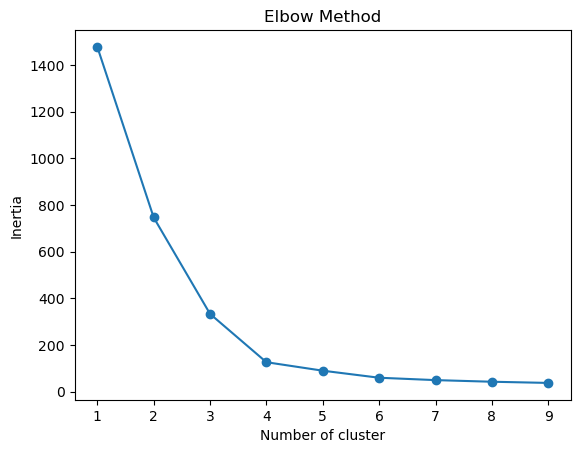

In [9]:
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters = k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,10), inertia, marker="o")
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()
##Grafik ini membentuk pola seperti siku yang disebut "elbow." Tujuan dari metode ini adalah untuk menemukan 
##titik di mana penurunan inertia (kurva yang tajam) menurun secara signifikan

In [10]:
kmeans = KMeans(n_clusters = 4, random_state=42)
kmeans.fit(penguins_PCA)

KMeans(n_clusters=4, random_state=42)

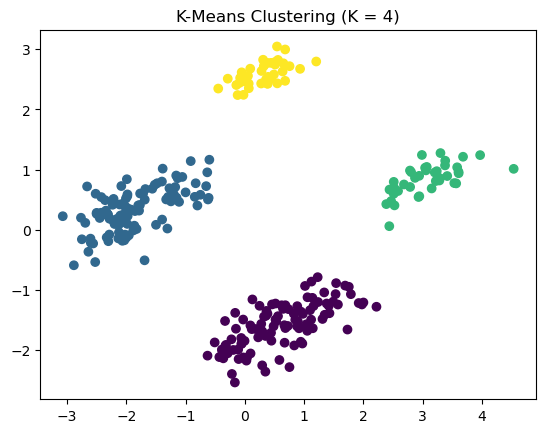

In [11]:
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap="viridis")
plt.title(f"K-Means Clustering (K = 4)")
plt.show()
##Plot ini dapat memberikan wawasan visual yang berguna tentang sejauh mana algoritma KMeans berhasil mengelompokkan data dengan benar.